## <center>Parcial<center>

##### Tomás Lopera Duque

Representantes de la American Heart Association planean ir de puerta en puerta por toda la comunidad, solicitando contribuciones. Por experiencias pasadas, saben que cuando alguien abre la puerta, el 80% de las veces es una mujer y el 20% de las veces es un hombre. También saben que el 70% de las mujeres que abren la puerta hacen una donación, mientras que solo el 40% de los hombres que abren la puerta hacen donaciones. La cantidad de dinero que aportan las mujeres sigue una distribución normal con una media de $20 y una desviación estándar de $3. La cantidad de dinero que aportan los hombres sigue una distribución normal con una media de $10 y una desviación estándar de $2. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import rv_histogram, rv_discrete, binom, norm
from statsmodels.distributions.empirical_distribution import ECDF

### 1. Entradas conocidas

In [64]:
# Probabilidad de que una persona sea hombre o mujer
prob_mujer = 0.80
prob_hombre = 0.20

# Probabilidad de que una persona done
prob_donacion_mujer = 0.70
prob_donacion_hombre = 0.40

# Distribución normal mujeres ($)
media_mujeres = 20
desviacion_mujeres = 3

# Distribución normal hombres ($)
media_hombres = 10
desviacion_hombres = 2

# Trial
N = 100000

### 2. Variables de decisión

- No existen en el problema

### 3. Entradas inciertas

In [65]:
dinero_mujeres = norm(loc=media_mujeres, scale=desviacion_mujeres)
dinero_hombres = norm(loc=media_hombres, scale=desviacion_hombres)

### 4. Calculos intermedios

In [95]:
donaciones = []

for _ in range(N):
    if np.random.rand() < prob_mujer:
        if np.random.rand() < prob_donacion_mujer:
            donaciones.append(dinero_mujeres.rvs())
        else:
            donaciones.append(0)
    else:
        if np.random.rand() < prob_donacion_hombre:
            donaciones.append(dinero_hombres.rvs())
        else:
            donaciones.append(0)

### 5. Salidas

##### b. Histograma

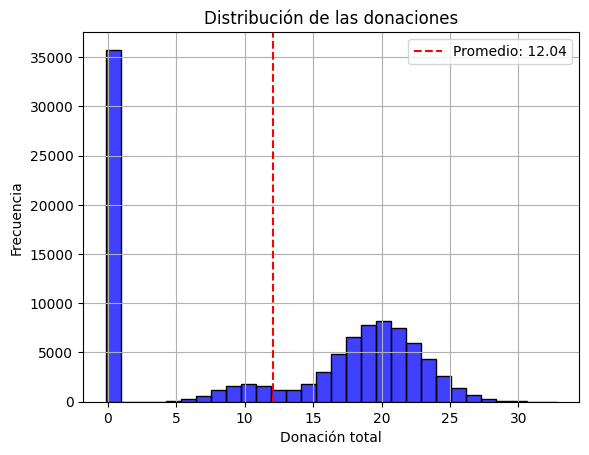

In [96]:
# Histograma de las donaciones
sns.histplot(donaciones, bins=30, color="blue")
plt.xlabel("Donación total")
plt.ylabel("Frecuencia")
plt.title("Distribución de las donaciones")
plt.axvline(np.mean(donaciones), color="red", label=f'Promedio: {np.mean(donaciones):.2f}', linestyle="--")
plt.legend()
plt.grid()
plt.show()

##### c. Contribución promedio esperada

In [97]:
promedio_donacion = np.mean(donaciones)
print(f"Contribución promedio esperada: ${promedio_donacion:.2f}")

Contribución promedio esperada: $12.04


##### d. Monto total esperado para 300 hogares

In [98]:
hogares = 300
prob_presente = 0.75  # Si nadie está en casa en el 25% de los hogares, el 75% restante está presente

monto_total_esperado = hogares * prob_presente * promedio_donacion
print(f"Monto total esperado en 300 hogares: ${monto_total_esperado:.2f}")

Monto total esperado en 300 hogares: $2709.70


##### e. Probabilidad de contribución mayor a $21

In [99]:
prob_mayor_21 = np.sum(np.array(donaciones) > 21) / N
print(f"Probabilidad de recibir más de $21 en una donación: {prob_mayor_21:.2%}")

Probabilidad de recibir más de $21 en una donación: 20.69%
